In [289]:
import pandas as pd
from glob import glob as lsfiles
import numpy as np
import pandas as pd
import datetime
from matplotlib import pyplot as plt
import seaborn as sns
import os
import matplotlib as mpl


from matplotlib import font_manager as fm, rcParams
fpath_reg = os.path.join(mpl.get_data_path(), "/Library/Fonts/RobotoCondensed-Regular.ttf")
prop_reg = fm.FontProperties(fname=fpath_reg)
fpath_light = os.path.join(mpl.get_data_path(), "/Library/Fonts/RobotoCondensed-light.ttf")
prop_light = fm.FontProperties(fname=fpath_light)

pd.options.mode.chained_assignment = None  # default='warn'



In [323]:
import warnings
warnings.filterwarnings('ignore')

In [290]:
df_hosp = pd.read_pickle('df_all_hosp.pkl')
df_death = pd.read_pickle('df_all_death.pkl')
df_case = pd.read_pickle('df_all_case.pkl')

In [291]:
df_hosp['WIS_normalized'] = df_hosp['WIS']/df_hosp['Population']
df_death['WIS_normalized'] = df_death['WIS']/df_death['Population']
df_case['WIS_normalized'] = df_case['WIS']/df_case['Population']

In [292]:
df_hosp = df_hosp.rename(columns= {"WIS_normalized":"values","Model":"group"})
df_death = df_death.rename(columns= {"WIS_normalized":"values","Model":"group"})
df_case = df_case.rename(columns= {"WIS_normalized":"values","Model":"group"})


In [293]:
df_case.head()

,group,WIS,50% Coverage,95% Coverage,Location,Population,Label,values
0,Ensemble,12953.849139,0.666667,0.888889,Alabama,4903185,Median aggregate,0.002642
1,Ensemble_LOP,11988.337519,0.888889,1.000000,Alabama,4903185,Median aggregate,0.002445
2,Ensemble_LOP_untrimmed,14195.242007,0.888889,1.000000,Alabama,4903185,Median aggregate,0.002895
3,JHU_IDD-CovidSP,11580.590399,0.888889,1.000000,Alabama,4903185,Median aggregate,0.002362
4,MOBS_NEU-GLEAM_COVID,11230.877077,0.333333,0.555556,Alabama,4903185,Median aggregate,0.002291


In [294]:
df_hosp.drop(df_hosp[df_hosp.group == 'NotreDame-FRED'].index, inplace=True)
df_hosp.drop(df_hosp[df_hosp.group == 'UTA-ImmunoSEIRS'].index, inplace=True)


df_death.drop(df_death[df_death.group == 'NotreDame-FRED'].index, inplace=True)
df_death.drop(df_death[df_death.group == 'UTA-ImmunoSEIRS'].index, inplace=True)


df_case.drop(df_case[df_case.group == 'NotreDame-FRED'].index, inplace=True)
df_case.drop(df_case[df_case.group == 'UTA-ImmunoSEIRS'].index, inplace=True)


In [295]:
df_case.group.unique()

array(['Ensemble', 'Ensemble_LOP', 'Ensemble_LOP_untrimmed',
       'JHU_IDD-CovidSP', 'MOBS_NEU-GLEAM_COVID', 'UNCC-hierbin',
       'USC-SIkJalpha', 'UVA-EpiHiper', 'UVA-adaptive'], dtype=object)

In [307]:
models = list(df_case.group.unique())
allmed = []
for model in models:
    med = df_case[df_case['group']== model]['WIS'].median()
    allmed.append(med)

In [308]:
a = zip(models, allmed)
a=list(a)
res = sorted(a, key = lambda x: x[1])
modelorder = list(zip(*res))[0]

In [309]:
#df_hosp.group = df_hosp.group.astype("category")
#df_hosp.group = df_hosp.group.cat.set_categories(modelorder)
#df_hosp.sort_values(["group"])


#df_death.group = df_death.group.astype("category")
#df_death.group = df_death.group.cat.set_categories(modelorder)
#df_death.sort_values(["group"])


df_case.group = df_case.group.astype("category")
df_case.group = df_case.group.cat.set_categories(modelorder)
df_case.sort_values(["group"])

,group,WIS,50% Coverage,95% Coverage,Location,Population,Label,values
233,MOBS_NEU-GLEAM_COVID,13078.904500,0.222222,0.555556,Missouri,6626371,Median aggregate,0.001974
278,MOBS_NEU-GLEAM_COVID,12461.187087,0.222222,0.444444,New Jersey,8882190,Median aggregate,0.001403
77,MOBS_NEU-GLEAM_COVID,1183.398973,0.222222,0.555556,District of Columbia,705749,Median aggregate,0.001677
287,MOBS_NEU-GLEAM_COVID,8112.574618,0.111111,0.333333,New Mexico,2096829,Median aggregate,0.003869
296,MOBS_NEU-GLEAM_COVID,24026.719859,0.222222,0.444444,New York,19453561,Median aggregate,0.001235
...,...,...,...,...,...,...,...,...
388,USC-SIkJalpha,24304.607471,0.000000,0.333333,Tennessee,6829174,Median aggregate,0.003559
289,USC-SIkJalpha,37042.774993,0.111111,0.333333,New Mexico,2096829,Median aggregate,0.017666
15,USC-SIkJalpha,19688.634821,0.111111,0.333333,Alaska,731545,Median aggregate,0.026914
107,USC-SIkJalpha,5880.622662,0.111111,0.222222,Hawaii,1415872,Median aggregate,0.004153


In [310]:
models = list(df_case.group.unique())
allmed = []
for model in models:
    med = df_case[df_case['group']== model]['values'].median()
    allmed.append(med)
a = zip(models, allmed)
a=list(a)
res = sorted(a, key = lambda x: x[1])
modelorder = list(zip(*res))[0]
df_case.group = df_case.group.astype("category")
df_case.group = df_case.group.cat.set_categories(modelorder)
df_case.sort_values(["group"])

,group,WIS,50% Coverage,95% Coverage,Location,Population,Label,values
233,MOBS_NEU-GLEAM_COVID,13078.904500,0.222222,0.555556,Missouri,6626371,Median aggregate,0.001974
278,MOBS_NEU-GLEAM_COVID,12461.187087,0.222222,0.444444,New Jersey,8882190,Median aggregate,0.001403
77,MOBS_NEU-GLEAM_COVID,1183.398973,0.222222,0.555556,District of Columbia,705749,Median aggregate,0.001677
287,MOBS_NEU-GLEAM_COVID,8112.574618,0.111111,0.333333,New Mexico,2096829,Median aggregate,0.003869
296,MOBS_NEU-GLEAM_COVID,24026.719859,0.222222,0.444444,New York,19453561,Median aggregate,0.001235
...,...,...,...,...,...,...,...,...
98,USC-SIkJalpha,22004.905928,0.222222,0.888889,Georgia,10617423,Median aggregate,0.002073
425,USC-SIkJalpha,45301.068870,0.111111,0.111111,Virginia,8535519,Median aggregate,0.005307
235,USC-SIkJalpha,101292.627159,0.111111,0.222222,Missouri,6626371,Median aggregate,0.015286
226,USC-SIkJalpha,10720.516674,0.000000,0.555556,Mississippi,2976149,Median aggregate,0.003602


In [331]:
def create_penguin_plots(data,kde_args, title ,color = "#49AFB7",color_category=None, group2name = None):
    
    """
    input:
    data (pandas dataframe): with the two columns named group and values
    kde_args (dictionary): contains information for the kde (lw is the line with, bw_adjust changes the smoothing), look up these args in seaborns kde plots to get more info
    color category: colors the dots different colors depending other whether you want to show that
    group2name (dict): keys are the groups (whatever is in the group column) and values are the "names"
    
    output: fig/ax of figure
    """


    total_groups = data.group.unique().shape[0]
    total_min = 0 #data['values'].min()
    total_max = data['values'].max()*1.2


    fig, ax = plt.subplots(total_groups*2,1,figsize = (22,total_groups*2.3),tight_layout = False)
    plt.subplots_adjust(hspace=-.08)

    i = 0
    for group, df in data.groupby("group"):


        values = df["values"].values # this is the list of values you are showing in your distribution
        print(group,np.median(values))


        #distribution
        sns.kdeplot(values, ax = ax[i],shade=True,lw=kde_args["lw"],bw_adjust=kde_args["bw_adjust"],color = color,)
        #sns.distplot(US_values, ax = ax[i],hist = False,
        #      kde_kws={"shade":False,"lw":"3"},color = "w")

        min_,max_ = ax[i].get_ylim()

        ax[i].set_ylim(ymin = 0, ymax = max_*1.1)


        sns.boxplot(values,ax = ax[i+1],color = color, showfliers = False, linewidth=1)
        for patch in ax[i+1].patches:
            r, g, b, a = patch.get_facecolor()
            patch.set_facecolor((r, g, b, .1))
            #fc = patch.get_facecolor()
            #patch.set_facecolor(mpl.colors.to_rgba(fc, 0.1))

        if color_category:
            cmap = mpl.cm.get_cmap('Set2', df.continent_label.unique().shape[0])
            ci = 0
            for cont, df_cont in df.groupby(color_category):
                sns.swarmplot(df_cont['values'].values,ax = ax[i+1],color = cmap(ci),alpha = .9,label = cont)
                ci+=1
            if i+1 ==1:
                ax[i+1].legend(loc = 1, prop= prop_light)
        else:
            sns.swarmplot(values,ax = ax[i+1],color = color,alpha = .35,) 

        ax[i].axis("off")
        ax[i+1].axis("off")

        ax[i+1].set_xlim(xmin = total_min,xmax = total_max,)
        ax[i].set_xlim(xmin = total_min,xmax = total_max)

        ax[i+1].set_ylim(-.6,.5)
        #if i != 6:
        #    ax[i+1].hlines(y = -.6,xmin = total_min,xmax = total_max,linewidth = 2,zorder = 100,color = "#49AFB7")

        text = "%s"
        if group2name:
            ax[i].text(.03,0,group2name[group],transform=ax[i].transAxes,  horizontalalignment= "right",\
               fontsize = 14, verticalalignment='center',backgroundcolor = "w")
        else:
            ax[i].text(-.01,0,group,transform=ax[i].transAxes,  horizontalalignment= "right",\
               fontsize = 14, verticalalignment='center',backgroundcolor = "w")
        i +=2
    last = i+1-2
    ax[last].axis("on")
    ax[last].spines["top"].set_visible(False)
    ax[last].spines["left"].set_visible(False)
    ax[last].spines["right"].set_visible(False)
    ax[last].set_facecolor("none")


    #Test
    ticks = ax[last].get_xticks()
    print(ticks)
    #ax[last-1].set_xticks([round(i,4) for i in ticks])
    #ax[last].set_xticklabels(["{:,}".format(int(i)) for i in ticks],  fontsize = 16)
    #ax[last-1].set_xticklabels([round(i,4) for i in ticks],  fontsize = 16)
    
    for t in ticks:
        if t != 0:
            for ii in range(total_groups*2):
                ax[ii].axvline(x = t,ymin = 0,ymax= 1,linewidth = .8,zorder = 0,color = "gray",alpha = 0.5)
                #ax[ii].vlines(x = t+5000,ymin = -.5,ymax= .444,linewidth = .8,zorder = 0,color = "gray",alpha = 0.5)
    plt.suptitle(title, fontsize=20)
    return fig, ax



Ensemble 3.710252165750786e-05
JHU_IDD-CovidSP 3.9983769096085856e-05
Ensemble_LOP 4.72840980354098e-05
Ensemble_LOP_untrimmed 6.9549338720405e-05


/Users/clara/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/clara/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/clara/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

UNCC-hierbin 9.500389495511381e-05
MOBS_NEU-GLEAM_COVID 0.00011217170402133078
UVA-EpiHiper 0.00013251526149931034
UVA-adaptive 0.00014916709586297873
USC-SIkJalpha 0.00043084115259448783
[0.     0.0002 0.0004 0.0006 0.0008 0.001  0.0012 0.0014]


/Users/clara/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/clara/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/clara/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

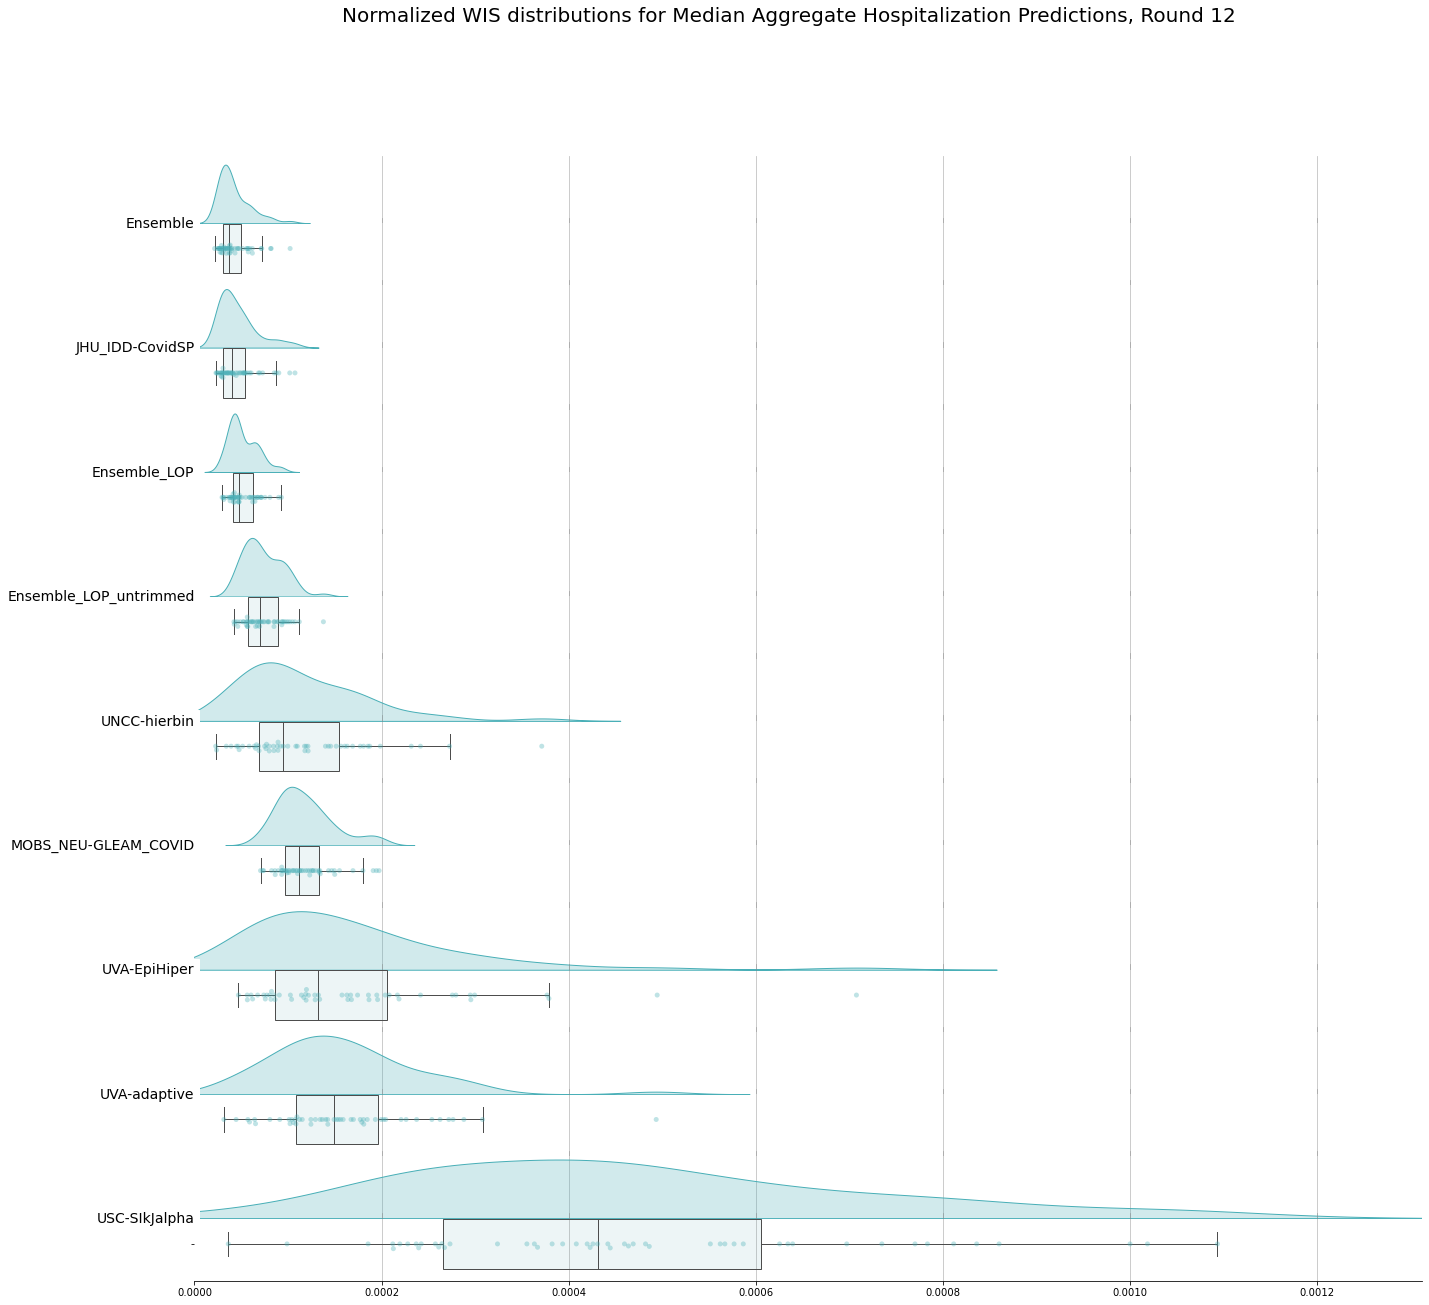

In [317]:

fig, ax_mat = create_penguin_plots(df_hosp,kde_args = {"lw":1,"bw_adjust":.9},
                                   title = 'Normalized WIS distributions for Median Aggregate Hospitalization Predictions, Round 12')
plt.savefig('distributionsplot_hosp.pdf')

Ensemble_LOP 1.340363583877401e-05
UVA-EpiHiper 1.3561634198757235e-05
Ensemble_LOP_untrimmed 1.392936219696301e-05
JHU_IDD-CovidSP 1.488484184584286e-05
MOBS_NEU-GLEAM_COVID 1.4934117252348008e-05
Ensemble 1.6250612968414835e-05
UNCC-hierbin 2.7037025076271336e-05
UVA-adaptive 3.47080121783535e-05
USC-SIkJalpha 6.638997459310203e-05
[0.0e+00 5.0e-05 1.0e-04 1.5e-04 2.0e-04 2.5e-04 3.0e-04 3.5e-04 4.0e-04
 4.5e-04]


/Users/clara/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/clara/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/clara/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

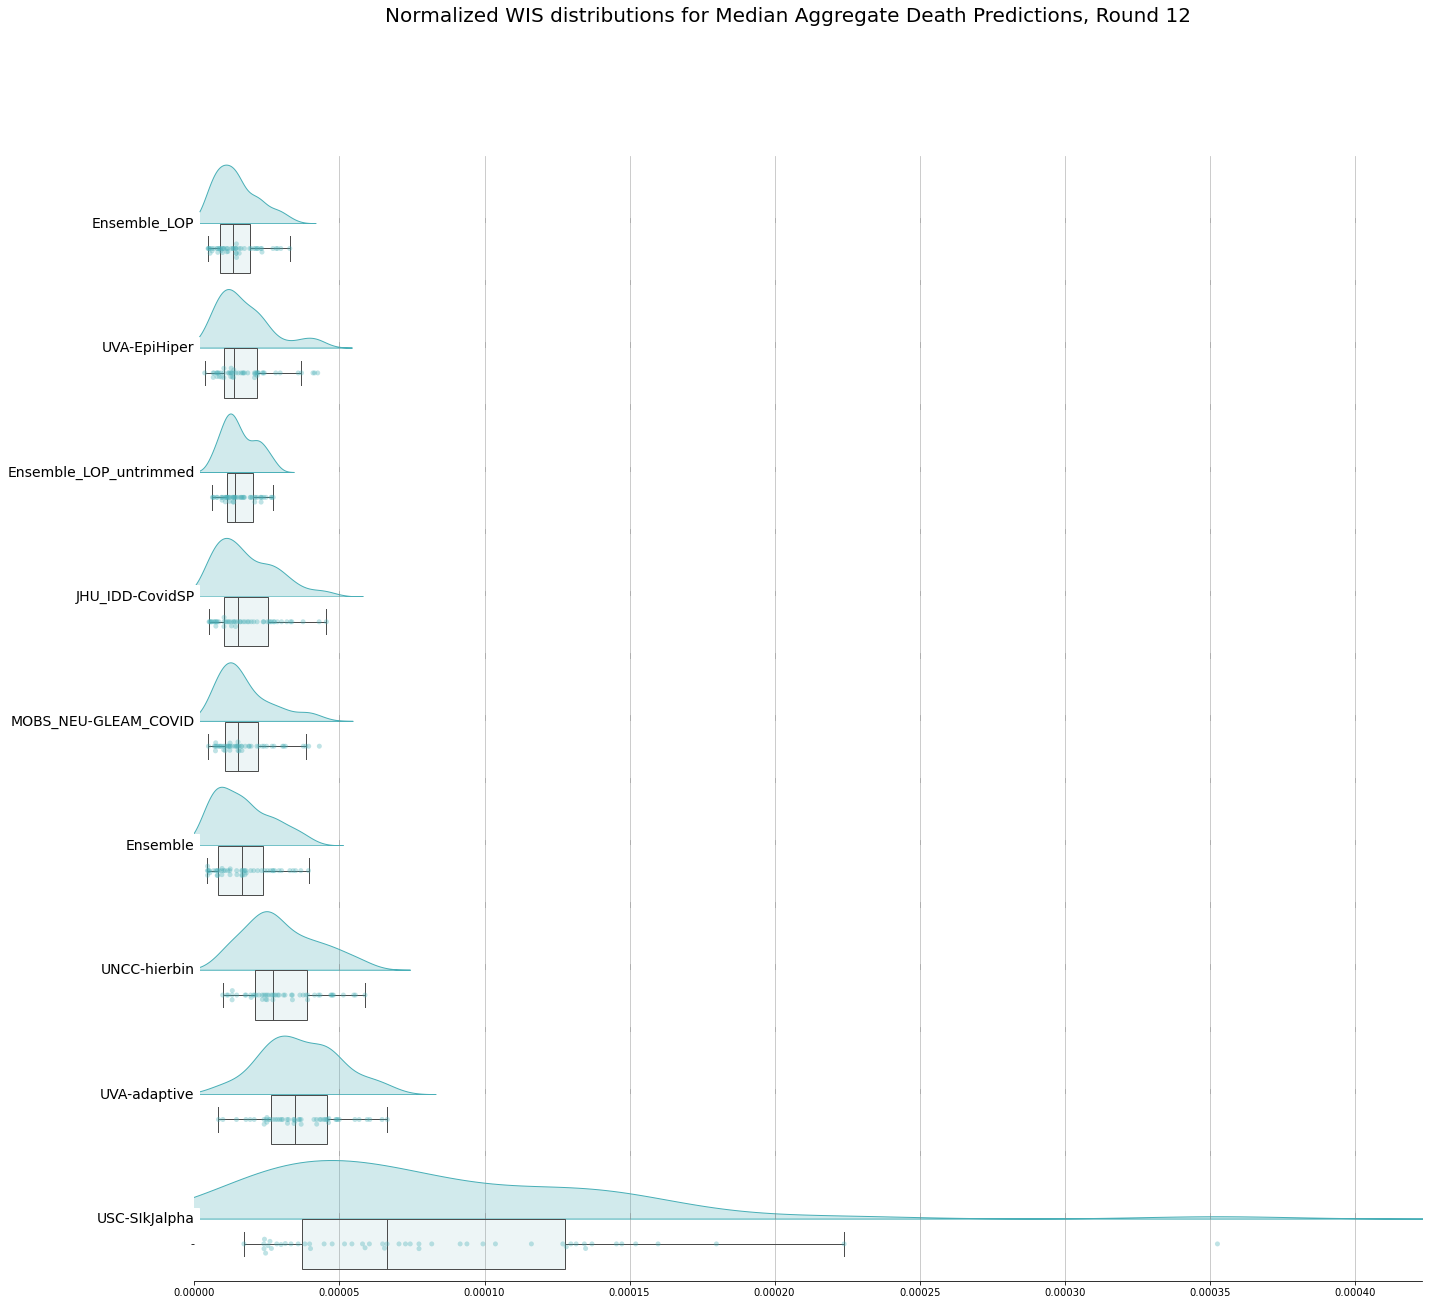

In [316]:
fig, ax_mat = create_penguin_plots(df_death,kde_args = {"lw":1,"bw_adjust":.9},
                                   title = 'Normalized WIS distributions for Median Aggregate Death Predictions, Round 12')
plt.savefig('distributionsplot_death.pdf')

MOBS_NEU-GLEAM_COVID 0.0022918380762062644
Ensemble_LOP 0.0029477634919837853
Ensemble 0.003069779255628768
Ensemble_LOP_untrimmed 0.003206212568640769
JHU_IDD-CovidSP 0.0035758398735711004
UNCC-hierbin 0.005718642556822831
UVA-EpiHiper 0.006133404711347134
UVA-adaptive 0.006512335623357892
USC-SIkJalpha 0.01004689824561058
[0.   0.01 0.02 0.03 0.04 0.05]


/Users/clara/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/clara/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/clara/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

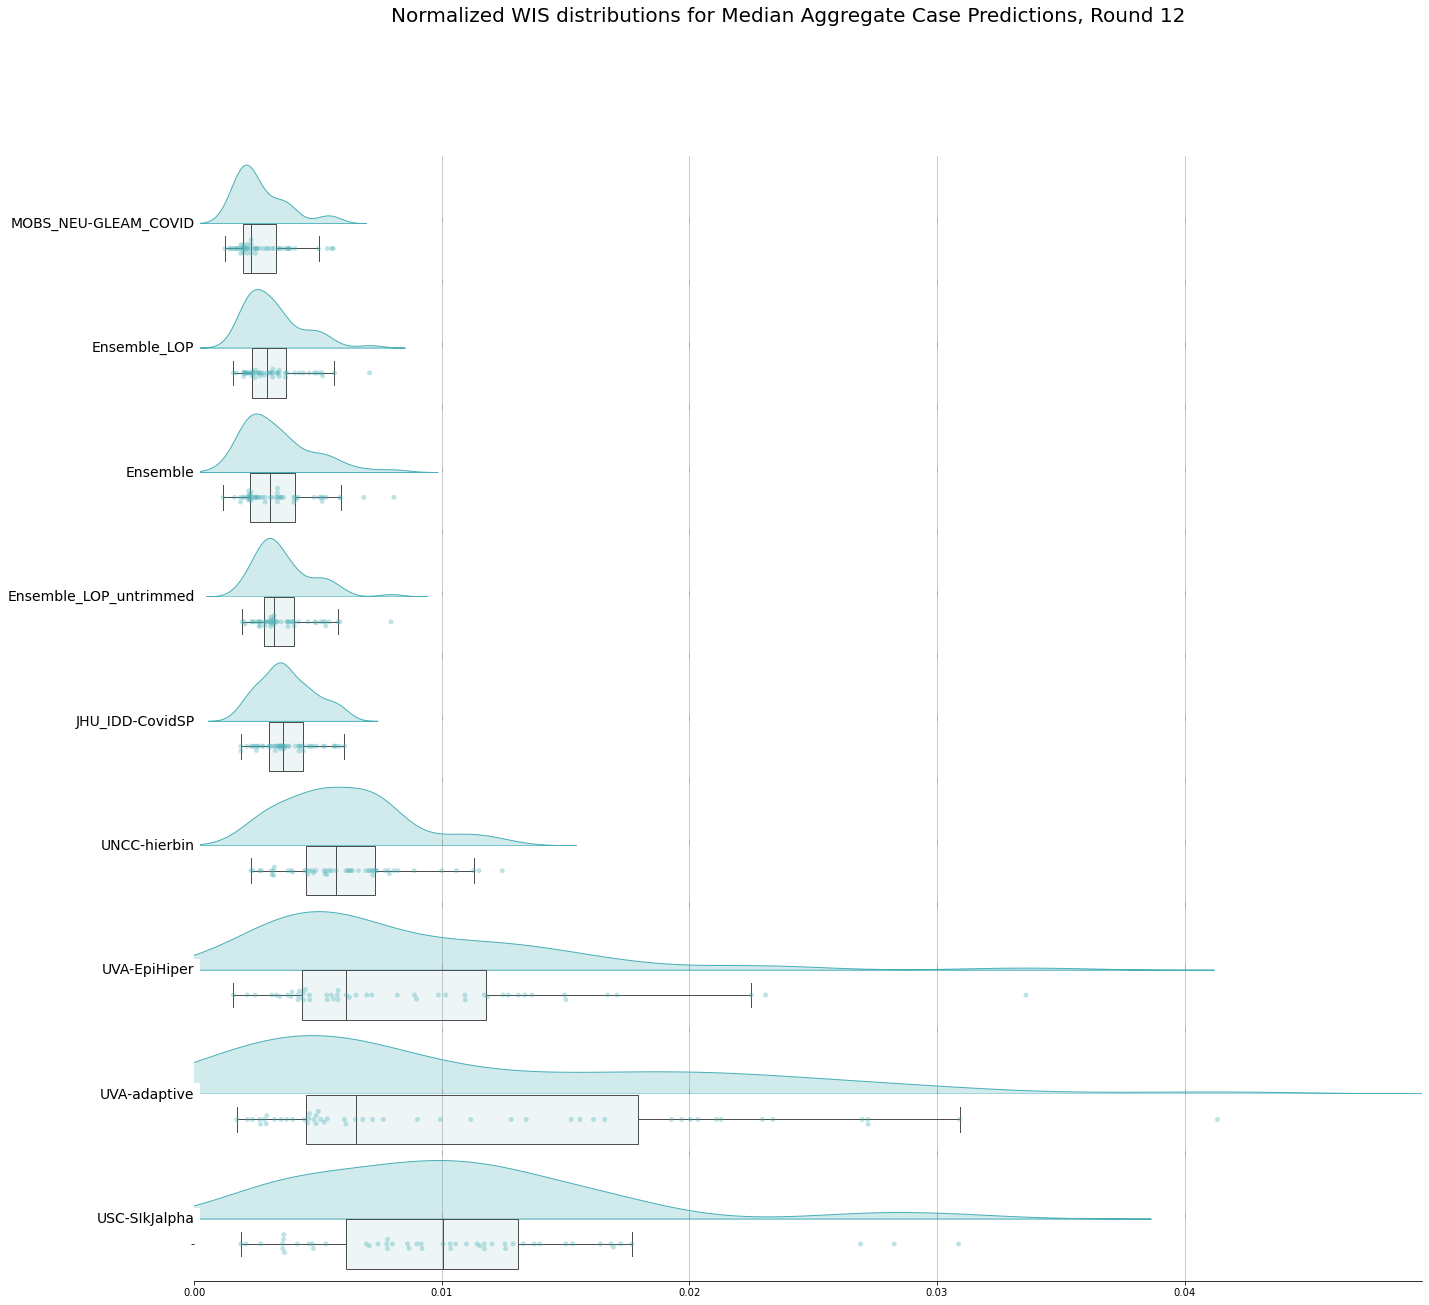

In [315]:
fig, ax_mat = create_penguin_plots(df_case,kde_args = {"lw":1,"bw_adjust":.9},
                                   title = 'Normalized WIS distributions for Median Aggregate Case Predictions, Round 12')
plt.savefig('distributionsplot_case.pdf')

# MAPE Analysis

In [318]:
df_hosp_mape = pd.read_pickle('df_point_hosp.pkl')
df_death_mape = pd.read_pickle('df_point_death.pkl')
df_case_mape = pd.read_pickle('df_point_case.pkl')

In [319]:
df_hosp_mape

,target_end_date,value,population,Model,Location
0,2022-01-15,2040.646200,4903185.0,Ensemble,Alabama
1,2022-01-22,2265.082994,4903185.0,Ensemble,Alabama
2,2022-01-29,2257.774845,4903185.0,Ensemble,Alabama
3,2022-02-05,1606.518086,4903185.0,Ensemble,Alabama
4,2022-02-12,747.015301,4903185.0,Ensemble,Alabama
...,...,...,...,...,...
4,2022-02-12,2.552938,578759.0,UVA-adaptive,Wyoming
5,2022-02-19,1.041048,578759.0,UVA-adaptive,Wyoming
6,2022-02-26,0.432865,578759.0,UVA-adaptive,Wyoming
7,2022-03-05,0.181544,578759.0,UVA-adaptive,Wyoming


In [320]:
df_hosp_mape = df_hosp_mape.rename(columns= {"value":"values","Model":"group"})
df_death_mape = df_death_mape.rename(columns= {"value":"values","Model":"group"})
df_case_mape = df_case_mape.rename(columns= {"value":"values","Model":"group"})


In [321]:
models = list(df_hosp_mape.group.unique())
allmed = []
for model in models:
    med = df_hosp_mape[df_hosp_mape['group']== model]['values'].median()
    allmed.append(med)
    
a = zip(models, allmed)
a=list(a)
res = sorted(a, key = lambda x: x[1])
modelorder = list(zip(*res))[0]

df_hosp_mape.group = df_hosp_mape.group.astype("category")
df_hosp_mape.group = df_hosp_mape.group.cat.set_categories(modelorder)
df_hosp_mape.sort_values(["group"])



models = list(df_death_mape.group.unique())
allmed = []
for model in models:
    med = df_death_mape[df_death_mape['group']== model]['values'].median()
    allmed.append(med)
    
a = zip(models, allmed)
a=list(a)
res = sorted(a, key = lambda x: x[1])
modelorder = list(zip(*res))[0]

df_death_mape.group = df_death_mape.group.astype("category")
df_death_mape.group = df_death_mape.group.cat.set_categories(modelorder)
df_death_mape.sort_values(["group"])




models = list(df_case_mape.group.unique())
allmed = []
for model in models:
    med = df_case_mape[df_case_mape['group']== model]['values'].median()
    allmed.append(med)
    
a = zip(models, allmed)
a=list(a)
res = sorted(a, key = lambda x: x[1])
modelorder = list(zip(*res))[0]

df_case_mape.group = df_case_mape.group.astype("category")
df_case_mape.group = df_case_mape.group.cat.set_categories(modelorder)
df_case_mape.sort_values(["group"])

,target_end_date,values,population,group,Location
8,2022-03-12,2.145000,6626371.0,MOBS_NEU-GLEAM_COVID,Missouri
5,2022-02-19,1282.875000,623989.0,MOBS_NEU-GLEAM_COVID,Vermont
4,2022-02-12,3661.350000,623989.0,MOBS_NEU-GLEAM_COVID,Vermont
3,2022-02-05,7617.885000,623989.0,MOBS_NEU-GLEAM_COVID,Vermont
2,2022-01-29,11977.515000,623989.0,MOBS_NEU-GLEAM_COVID,Vermont
...,...,...,...,...,...
5,2022-02-19,13479.755519,1359711.0,UVA-EpiHiper,New Hampshire
6,2022-02-26,11475.385477,1359711.0,UVA-EpiHiper,New Hampshire
8,2022-03-12,3599.458005,623989.0,UVA-EpiHiper,Vermont
3,2022-02-05,537561.855738,39512223.0,UVA-EpiHiper,California


UVA-adaptive 95.5920925943822
MOBS_NEU-GLEAM_COVID 235.275
UNCC-hierbin 339.0
JHU_IDD-CovidSP 423.41487453136705
Ensemble 517.5636207056914
Ensemble_LOP 530.6035841037348
Ensemble_LOP_untrimmed 535.881316150471
UVA-EpiHiper 2031.439619435405
UTA-ImmunoSEIRS 2119.3735340526655
USC-SIkJalpha 2646.05
[     0.  20000.  40000.  60000.  80000. 100000. 120000.]


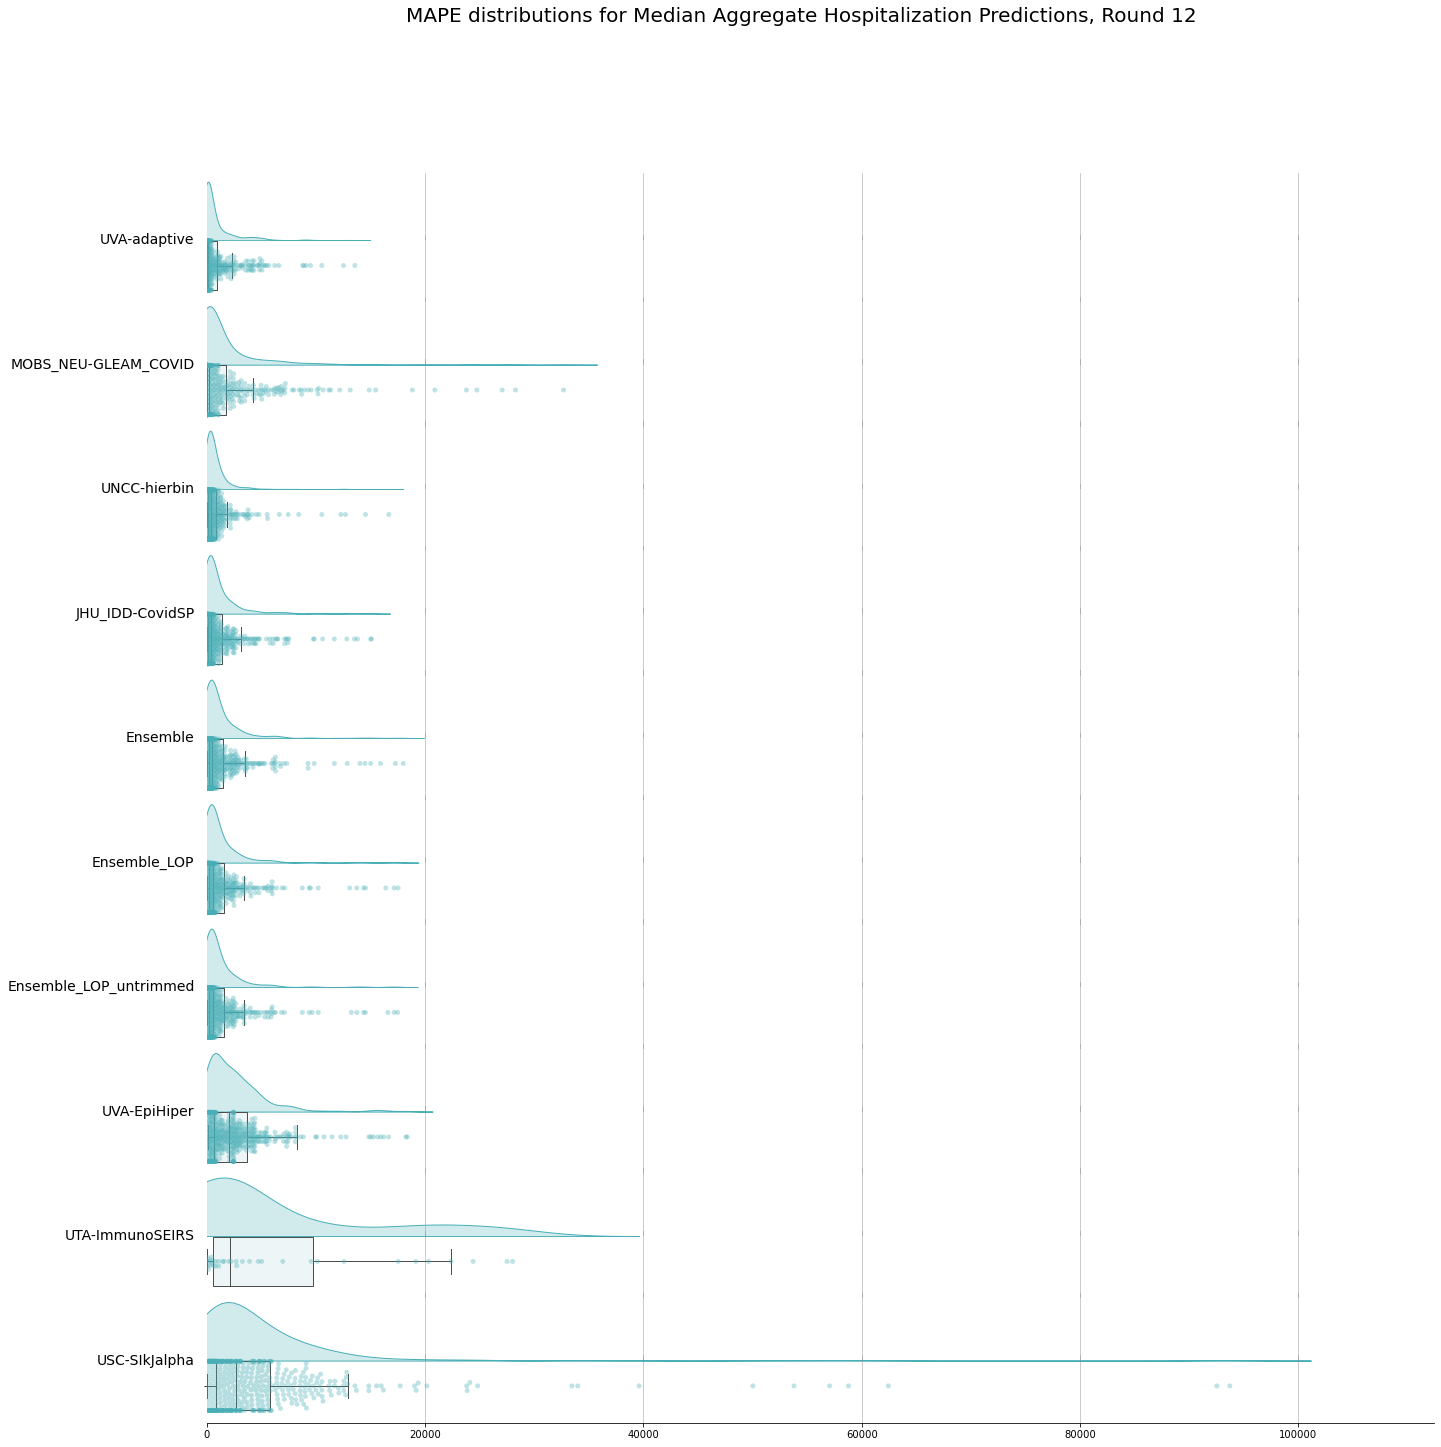

In [332]:
fig, ax_mat = create_penguin_plots(df_hosp_mape,kde_args = {"lw":1,"bw_adjust":.9},
                                   title = 'MAPE distributions for Median Aggregate Hospitalization Predictions, Round 12')
#plt.savefig('distributionsplot_hosp.pdf')

UVA-adaptive 9.02671640170266
UNCC-hierbin 38.5
JHU_IDD-CovidSP 60.28426065106789
Ensemble 74.66638500162036
Ensemble_LOP 74.69466602492093
Ensemble_LOP_untrimmed 75.20543970678965
MOBS_NEU-GLEAM_COVID 80.35373988799688
UVA-EpiHiper 112.825413237399
UTA-ImmunoSEIRS 295.23954049877534
USC-SIkJalpha 450.9
NotreDame-FRED 486.0
[    0.  2000.  4000.  6000.  8000. 10000. 12000. 14000. 16000. 18000.]


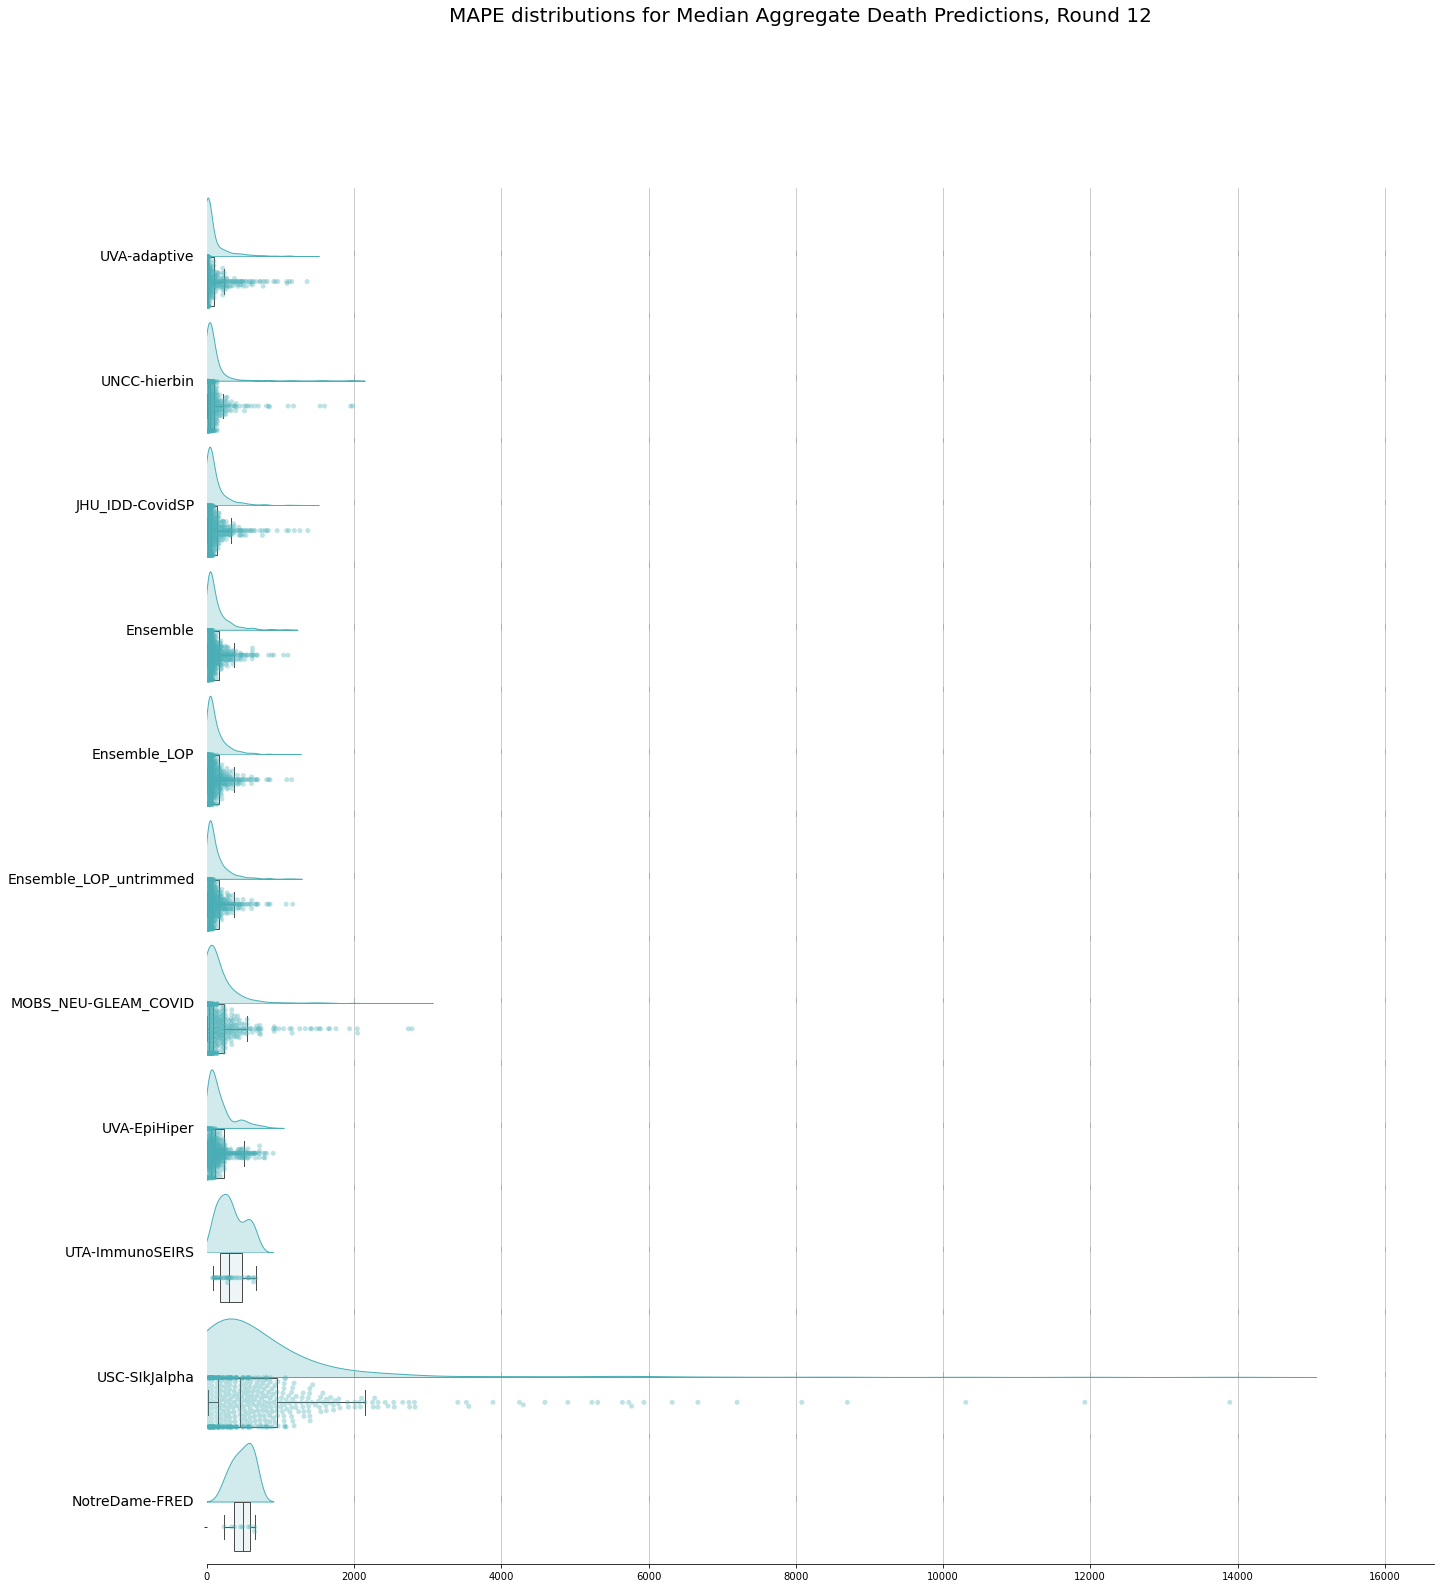

In [333]:
fig, ax_mat = create_penguin_plots(df_death_mape,kde_args = {"lw":1,"bw_adjust":.9},
                                   title = 'MAPE distributions for Median Aggregate Death Predictions, Round 12')
#plt.savefig('distributionsplot_hosp.pdf')

MOBS_NEU-GLEAM_COVID 1258.455
UTA-ImmunoSEIRS 17111.91846698839
UVA-adaptive 21075.75
Ensemble_LOP 27536.081931753273
Ensemble_LOP_untrimmed 27715.671017344084
Ensemble 29129.16912134732
UNCC-hierbin 31616.75
JHU_IDD-CovidSP 32307.349654989477
USC-SIkJalpha 47755.25
UVA-EpiHiper 59638.482122937305
[      0.  500000. 1000000. 1500000. 2000000. 2500000. 3000000.]


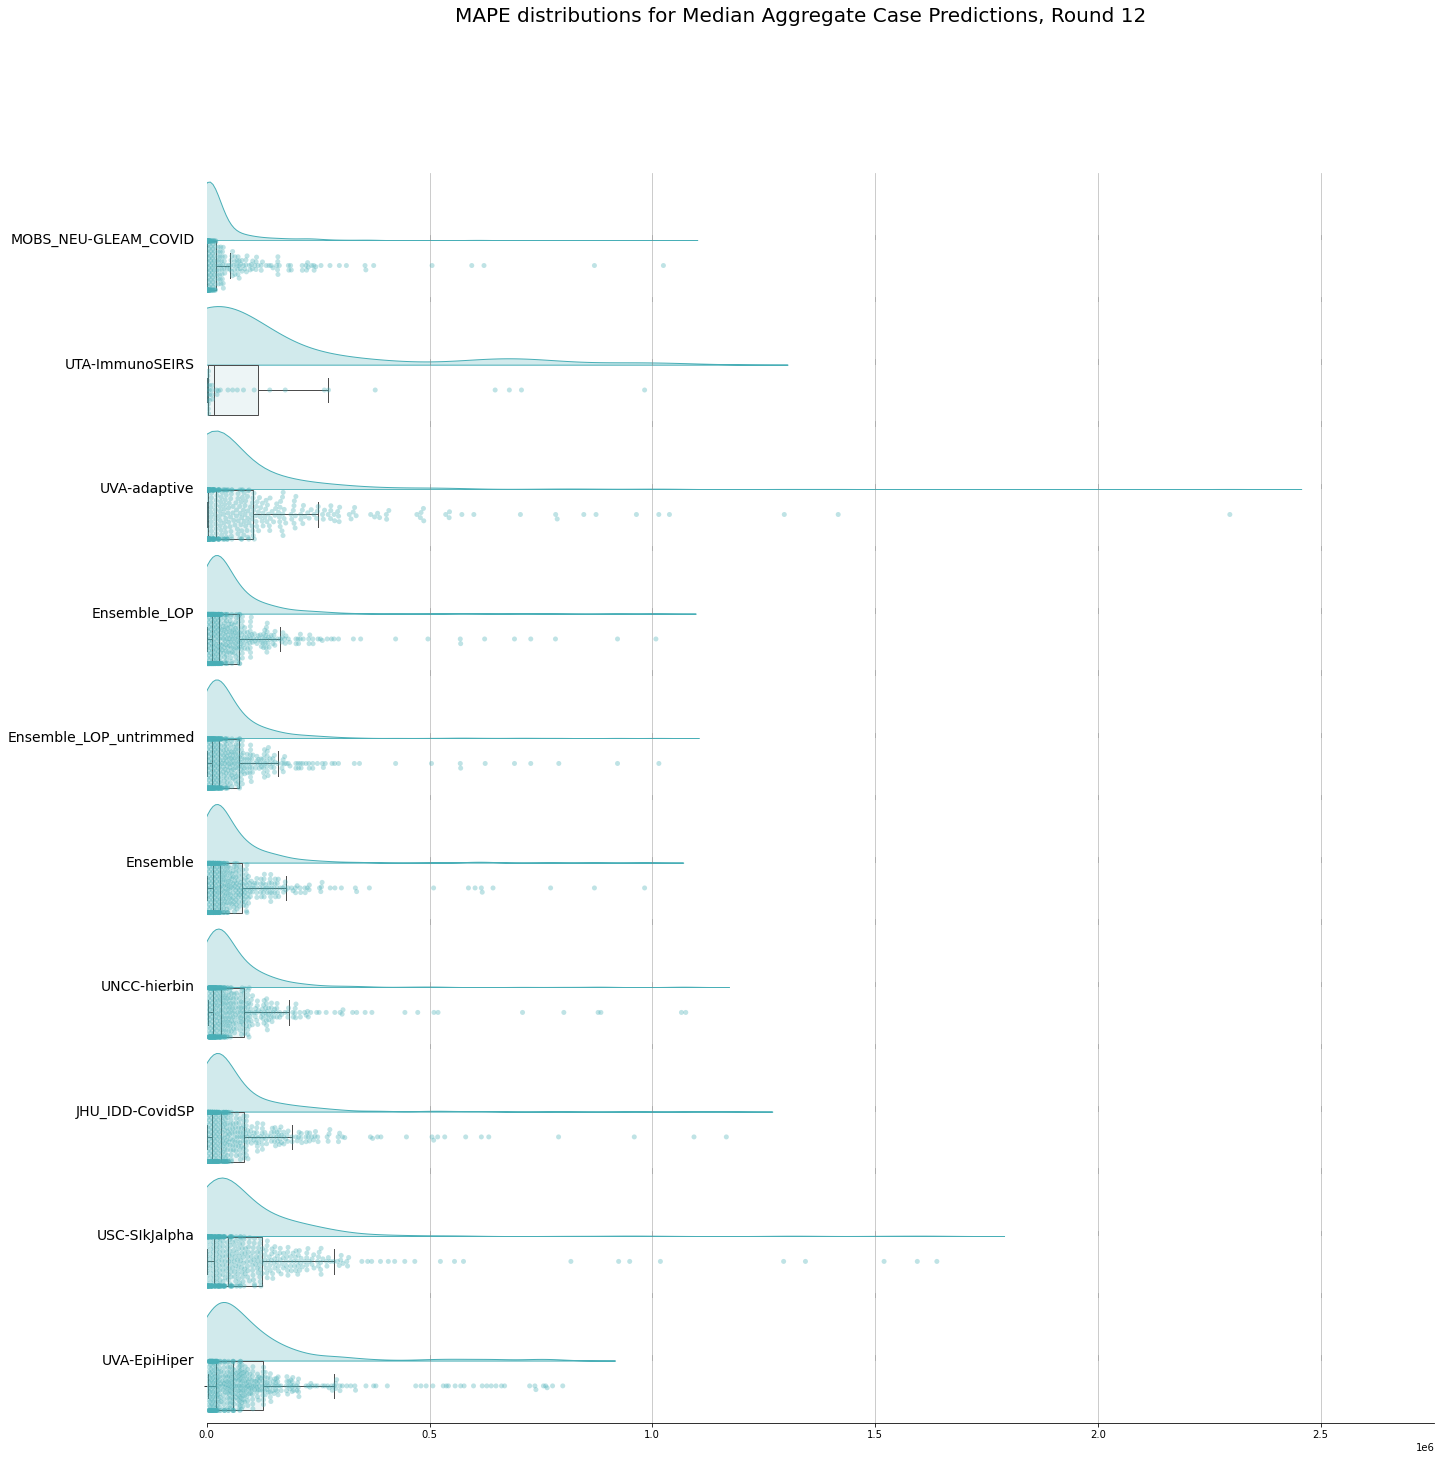

In [334]:
fig, ax_mat = create_penguin_plots(df_case_mape,kde_args = {"lw":1,"bw_adjust":.9},
                                   title = 'MAPE distributions for Median Aggregate Case Predictions, Round 12')
#plt.savefig('distributionsplot_hosp.pdf')